In [5]:
from symbulate import *
%matplotlib inline
from matplotlib import pyplot as plt

# Matching problem

In [2]:
n = 4
labels = list(range(n))
labels

[0, 1, 2, 3]

In [3]:
# matching problem - number of matches
def count_matches(x):
    count = 0
    for i in range(0, n, 1):
        if x[i] == labels[i]:
            count += 1
    return count

count_matches((0,1,3,2))

2

In [4]:
P = BoxModel(labels, size = n, replace = False)
X = RV(P, count_matches)

In [5]:
x = X.sim(24000)
x

0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,2
8,0
...,...
23999,0


In [6]:
x.sum() / 24000

1.009

In [7]:
x.mean()

1.009

0,8960
1,8004
2,5966
4,1070
Total,24000


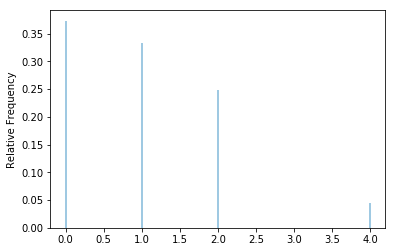

In [8]:
x.plot()
x.tabulate()

In [9]:
x.tabulate(normalize = True)

0,0.37333333333333335
1,0.3335
2,0.24858333333333332
4,0.044583333333333336
Total,1.0000000000000002


## Running average

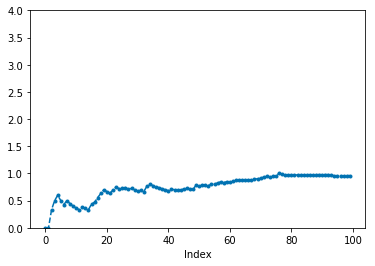

In [9]:
rmax = 100
P = BoxModel([0, 1, 2, 4], probs = [9/24, 8/24, 6/24, 1/24]) ** rmax
X = RV(P)
Xbar_r = RandomProcess(P)

for r in range(rmax):
    Xbar_r[r] = X[0:(r + 1)].apply(mean)
    
Xbar_r.sim(1).plot(tmax = rmax)
plt.ylim(0, 4);

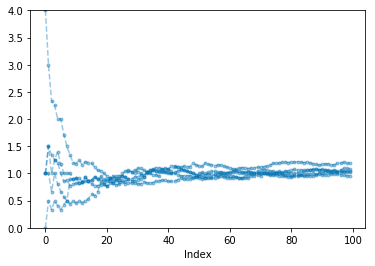

In [10]:
Xbar_r.sim(5).plot(tmax = rmax)
plt.ylim(0, 4);

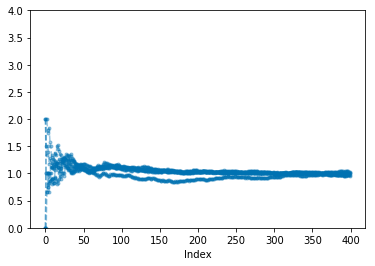

In [11]:
rmax = 400
P = BoxModel([0, 1, 2, 4], probs = [9/24, 8/24, 6/24, 1/24]) ** rmax
X = RV(P)
Xbar_r = RandomProcess(P)

for r in range(rmax):
    Xbar_r[r] = X[0:(r + 1)].apply(mean)
    
Xbar_r.sim(5).plot(tmax = rmax)
plt.ylim(0, 4);

## Varying n

In [13]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets

Nrep = 10000

def matching_sim(n):
    labels = list(range(n))
    def count_matches(omega):
        count = 0
        for i in range(0, n, 1):
            if omega[i] == labels[i]:
                count += 1
        return count
    
    P = BoxModel(labels, size = n, replace = False)
    Y = RV(P, count_matches)
    y = Y.sim(Nrep)
    y.plot()
    plt.ylim(0, 0.4)
    plt.xlim(-1, 10.2)
    plt.title('n=%i' %n + ': Mean of %i' %Nrep + ' simulated values is %1.3f' %y.mean())
    plt.show()

interact(matching_sim, n=ipywidgets.IntSlider(min=4, max=50, step=1, value=1));

interactive(children=(IntSlider(value=4, description='n', max=50, min=4), Output()), _dom_classes=('widget-int…